# math2015-Math2 Data Analysis

In [1]:
import numpy as np
import pandas as pd

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go

In [2]:
path = "C:/Users/Administrator/Desktop/Math2/rawdata.txt"
data = pd.read_table(path,header=None)

## RECORDS

### Table rows ---- student_id
### Table columns ---- problem_id
### Table ------ Student's score on each problem

In [3]:
pd.set_option('display.max_rows',10)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,3,0,0,0,3,0,3,3,3,3,0,0,0,0,0,0,0,0,6,0
1,3,3,3,3,3,3,3,0,3,0,0,3,4,0,0,4,12,12,6,1
2,3,3,3,0,0,0,3,3,0,0,0,3,4,0,0,0,8,0,6,0
3,0,3,3,3,0,3,3,0,3,3,0,3,0,0,0,0,12,12,6,0
4,3,3,0,0,3,3,0,0,3,0,0,3,0,0,0,4,4,12,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3906,3,3,0,3,3,0,0,0,3,0,0,3,0,0,0,0,6,0,6,1
3907,3,0,3,3,3,3,3,3,0,0,3,3,4,4,0,0,6,2,6,0
3908,3,3,0,3,3,3,3,0,3,3,0,0,0,0,0,0,2,12,6,4
3909,3,3,0,3,3,3,0,0,3,0,0,3,0,0,4,0,1,12,3,0


## General features

In [4]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.00000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000
mean,2.633342,2.120174,1.608540,2.162363,1.300946,1.893122,1.765789,0.441064,2.145487,1.72360,1.418307,1.548709,1.557658,0.413194,0.805932,0.773204,4.384301,5.333419,6.609051,1.724367
std,0.982743,1.365965,1.496259,1.346009,1.486924,1.447754,1.476453,1.062517,1.354184,1.48343,1.497965,1.499401,1.950719,1.217549,1.604637,1.579750,3.812531,4.820757,3.085368,2.542170
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000
50%,3.000000,3.000000,3.000000,3.000000,0.000000,3.000000,3.000000,0.000000,3.000000,3.00000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,4.000000,5.000000,6.000000,0.000000
75%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,0.000000,3.000000,3.00000,3.000000,3.000000,4.000000,0.000000,0.000000,0.000000,6.000000,11.000000,7.000000,3.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,12.000000,12.000000,12.000000,10.000000


In [5]:
print('The number of records:' + str(len(data)))

The number of records:3911


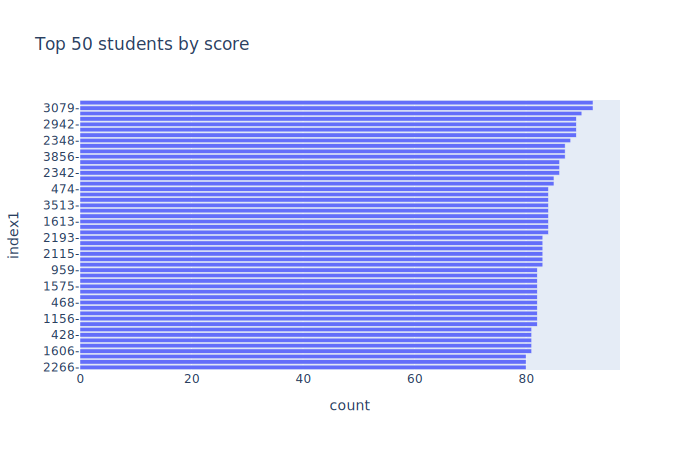

In [6]:
data['count']=data.apply(lambda x: x.sum(),axis=1)
data['index1']=data.index
ds=data.loc[:, ['count', 'index1']]
ds['index1'] = ds['index1'].astype(str) + '-'
ds = ds.sort_values(['count']).tail(50)
fig = px.bar(
    ds,
    x = 'count',
    y = 'index1',
    orientation='h',
    title='Top 50 students by score'
)

fig.show("svg")

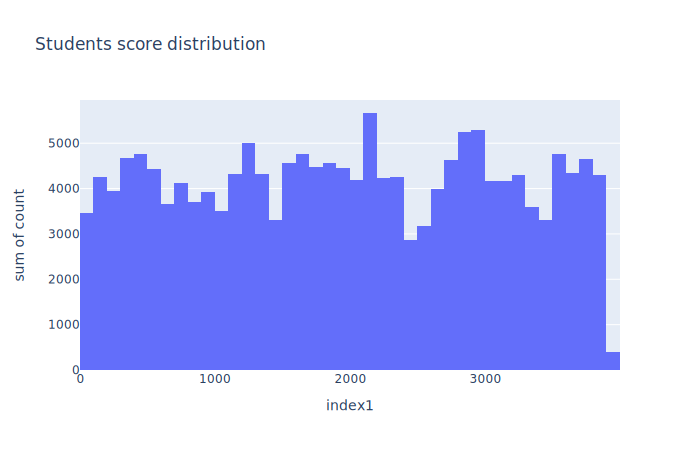

In [7]:
ds=data.loc[:, ['count', 'index1']]
ds = ds.sort_values(['index1'])
fig = px.histogram(
    ds,
    x='index1',
    y='count',
    title='Students score distribution'
)
fig.show("svg")

## Sort by correct rate

In [8]:
path = "C:/Users/Administrator/Desktop/Math2/data.txt"
data = pd.read_table(path,header=None)

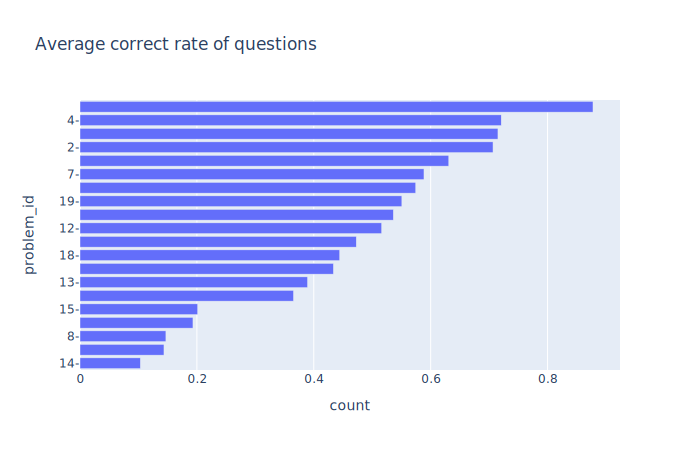

In [9]:
ds = data.mean()
ds1=pd.DataFrame(columns=['problem_id','count'])
for i in range(len(ds)):
    new=pd.DataFrame({
        'problem_id':int(i),
        'count':ds[i]
    },index=[0]
    )
    ds1=ds1.append(new,ignore_index=True)

ds1=ds1.sort_values(['count'])
ds1['problem_id'] = (ds1['problem_id']+1).astype(str) + '-'
fig = px.bar(
    ds1,
    x = 'count',
    y = 'problem_id',
    orientation = 'h',
    title = 'Average correct rate of questions'
)

fig.show("svg")

## Sort by problem type

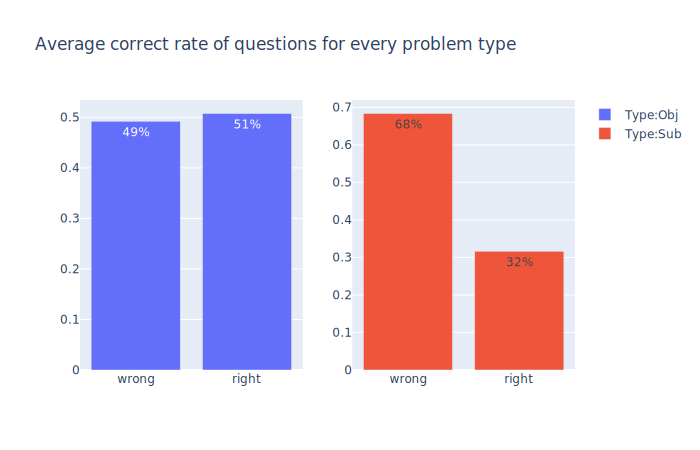

In [10]:
ds = data.mean()
ds1=pd.DataFrame(columns=['problem_id','count'])
for i in range(len(ds)):
    new=pd.DataFrame({
        'problem_id':int(i),
        'count':ds[i]
    },index=[0]
    )
    ds1=ds1.append(new,ignore_index=True)

data2= [('Obj',ds1[ds1['problem_id']<15]['count'].mean()),
    ('Sub',ds1[ds1['problem_id']>=14]['count'].mean())]
ds2 = pd.DataFrame(
    data=data2,
    columns=['Type','Percent']
)

fig = make_subplots(rows=1,cols=2)
traces = [
    go.Bar(
        x=['wrong','right'],
        y=[ 
        1-float(ds2[ds2['Type']==item]['Percent']),
        float(ds2[ds2['Type']==item]['Percent'])
        ],
        name='Type:' + str(item),
        text=[
        str(round(100*(1-float(ds2[ds2['Type']==item]['Percent'])))) + '%',
        str(round(100*float(ds2[ds2['Type']==item]['Percent']))) + '%'
        ],
        textposition='auto'
    ) for item in ds2['Type'].tolist()
]
for i in range(len(traces)):
    fig.append_trace(
        traces[i],
        (i //2) + 1,
        (i % 2) + 1
    )    
fig.update_layout(
    title_text = 'Average correct rate of questions for every problem type',
)

fig.show("svg")

In [11]:
path = "C:/Users/Administrator/Desktop/Math2/problemdesc.txt"
data1 = pd.read_table(path,header=0)

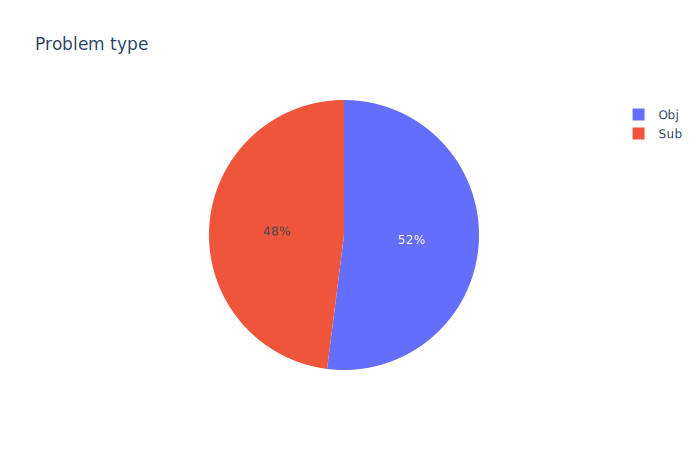

In [12]:
count = data1['Full Score'].sum()
data2= [('Obj',data1[data1['Type']=='Obj']['Full Score'].sum()),
    ('Sub',data1[data1['Type']=='Sub']['Full Score'].sum())]
ds = pd.DataFrame(
    data=data2,
    columns=['Type','Percent']
)

ds['Percent']/=count
ds=ds.sort_values('Percent')

fig=px.pie(
    ds,
    names='Type',
    values='Percent',
    title='Problem type',
)
fig.show("svg")

## Sort by skills

In [13]:
path1 = "C:/Users/Administrator/Desktop/Math2/q.txt"
data1 = pd.read_table(path1,header=None)

In [14]:
ds1 = data1.sum()

In [15]:
path2 = "C:/Users/Administrator/Desktop/Math2/qnames.txt"
data2 = pd.read_table(path2,header=0)

In [16]:
ds=pd.DataFrame(columns=['skill','count'])
for i in range(len(ds1)):
    new=pd.DataFrame({ 
        'skill':data2['Skill Names'][i],
        'count':ds1[i]
    },index=[0]
    )
    ds=ds.append(new,ignore_index=True)

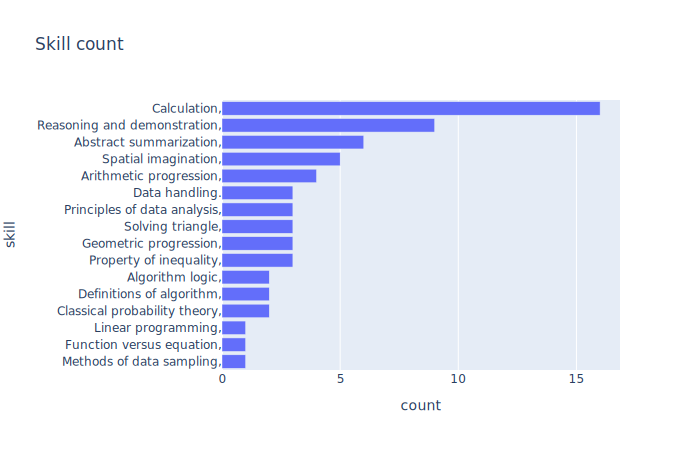

In [17]:
ds=ds.sort_values(['count'])
fig = px.bar(
    ds,
    x='count',
    y='skill',
    orientation='h',
    title='Skill count'
)
fig.show("svg")